<a href="https://colab.research.google.com/github/mherbsom/AAE590/blob/main/3_3_25_inclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

False
Covariance matrix 

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]
<class 'list'>

 [(2.930353775589317, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])), (0.9274036215173419, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])), (0.14834222648163944, array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])), (0.02074601399559593, array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]



Eigenvalues in descending order:
2.930353775589317
0.9274036215173419
0.14834222648163944
0.02074601399559593

 4.026845637583894


1. Variance Explained
 [72.77045209380135, 23.03052326768065, 3.683831957627379, 0.5151926808906321]


2. Cumulative Variance Explained
 [ 72.77045209  95.80097536  99.48480732 100.        ]


3. Percentage of

,principal component1,principal component2,species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


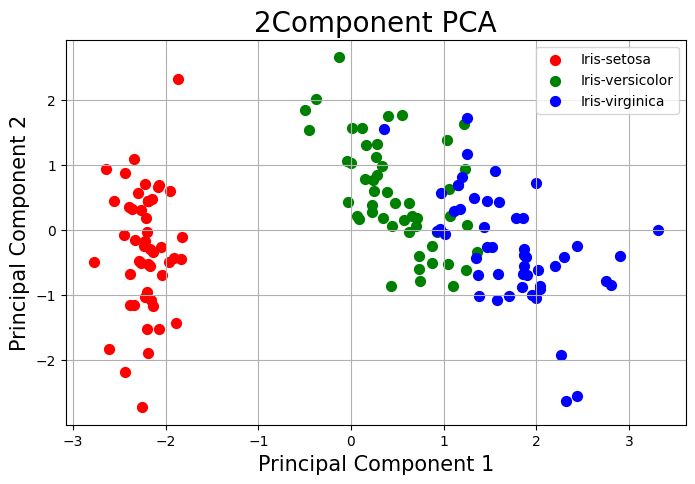

In [1]:
!pip install scikit-learn
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
df = pd.read_csv( filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, sep=',')
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
print(df.isnull().values.any())
df.dropna(how="all", inplace=True)
# drops the empty line at file-end
#if inplace = False then we have to assign back to dataframe as it is a copy
#df = df.some_operation(inplace=False)
#No need to assign back to dataframe when inplace = True
#df.some_operation(inplace=True)
#Print Last five rows.
df.tail()
#Separate the Target column that is the class column values in y array and rest of the values of the independent features in X array variables as below.
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values
X
y
#Standardization
X_std = StandardScaler().fit_transform(X)
#In the output screenshot below you see that all X_std values are standardized in the range of -1 to +1.
X_std
#Eigen decomposition — Computing Eigenvectors and Eigenvalues
#Covariance Matrix
#mean_vec = np.mean(X_std, axis=0)
#cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
#print('Covariance matrix \n%s' %cov_mat)
print('Covariance matrix \n')
cov_mat= np.cov(X_std, rowvar=False)
cov_mat
#Eigenvectors and Eigenvalues computation from the covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)
#Selecting The Principal Components
#arrange eigen values
#choose op k features concerning top k Eigenvalues
#The idea here is that by choosing top k we have decided that the variance which corresponds to those k feature space is enough to describe the data set
#Sorting eigenvalues
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
print(type(eig_pairs))
eig_pairs.sort()
eig_pairs.reverse()
print("\n",eig_pairs)
#Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('\n\n\nEigenvalues in descending order:')
for i in eig_pairs:print(i[0])
#Explained Variance
tot = sum(eig_vals)
print("\n",tot)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print("\n\n1. Variance Explained\n",var_exp)
cum_var_exp = np.cumsum(var_exp)
print("\n\n2. Cumulative Variance Explained\n",cum_var_exp)
print("\n\n3. Percentage of variance the first two principal components each contain\n ",var_exp[0:2])
print("\n\n4. Percentage of variance the first two principal components together contain\n",sum(var_exp[0:2]))
#Construct the projection matrix W from the selected k eigenvectors
print(eig_pairs[0][1])
print(eig_pairs[1][1])
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
#hstack: Stacks arrays in sequence horizontally (column wise).
print('Matrix W:\n', matrix_w)
#Projection Onto the New Feature Space
Y = X_std.dot(matrix_w)
principalDf = pd.DataFrame(data = Y , columns = ['principal component1', 'principal component 2'])
principalDf.head()
#Now let’s combine the target class variable which we separated in the very beginning of the post.
finalDf = pd.concat([principalDf,pd.DataFrame(y,columns =['species'])], axis = 1)
finalDf.head()
#Visualize 2D Projection
fig = plt.figure(figsize = (8,5))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2Component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
  indicesToKeep = finalDf['species'] == target
  ax.scatter(finalDf.loc[indicesToKeep, 'principal component1'] , finalDf.loc[indicesToKeep, 'principal component 2'] , c = color , s =50)
  ax.legend(targets)
  ax.grid()
#Use of Python Libraries to directly compute Principal Components
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)
principalDf = pd.DataFrame(data = principalComponents , columns =['principal component1', 'principal component2'])
principalDf.head(5)
finalDf = pd.concat([principalDf, finalDf[['species']]], axis = 1)
finalDf.head(5)